## Script to get some prliminary statistics about the predictions with one drug and samples


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#importing the datasets

pi_results_filepath = "./PI_DataSe_results.csv"
#INI_results_filepath = "./INI_DataSe_results.csv"  INI did not have any results as the threshold are not set by stanford. To-do: find them
nnrti_results_filepath = "./NNRTI_DataSe_results.csv"
nrti_results_filepath = "./NRTI_DataSe_results.csv"

pi_single_drug_results = pd.read_csv(pi_results_filepath)
nnrti_single_drug_results = pd.read_csv(nnrti_results_filepath)
nrti_single_drug_results = pd.read_csv(nrti_results_filepath)

In [14]:
#print(pi_single_drug_results.describe())

       Unnamed: 0      Samples   AUC ROC      Time    AUC RF   AUC XGB  \
count     8.00000     8.000000  8.000000  8.000000  8.000000  8.000000   
mean      3.50000  1912.625000  0.951686  3.812002  0.931465  0.939035   
std       2.44949   481.605629  0.011915  2.331047  0.019088  0.014812   
min       0.00000  1116.000000  0.935890  1.386930  0.888973  0.905304   
25%       1.75000  1578.250000  0.944538  2.389714  0.929892  0.938808   
50%       3.50000  2122.500000  0.950741  3.640709  0.935361  0.942997   
75%       5.25000  2297.250000  0.955132  4.112424  0.938566  0.944799   
max       7.00000  2344.000000  0.975573  8.954915  0.955897  0.954981   

       AUC CatB  
count  8.000000  
mean   0.946456  
std    0.016123  
min    0.909964  
25%    0.946671  
50%    0.950611  
75%    0.952718  
max    0.964586  


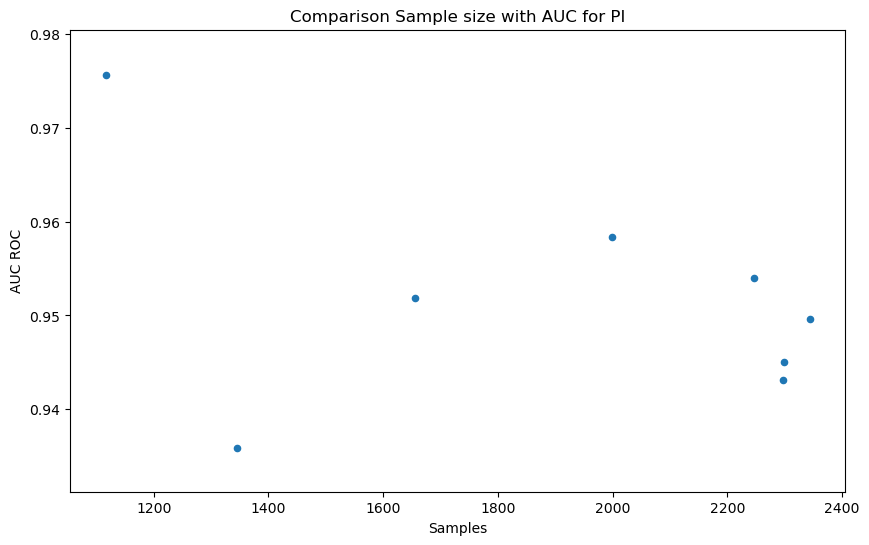

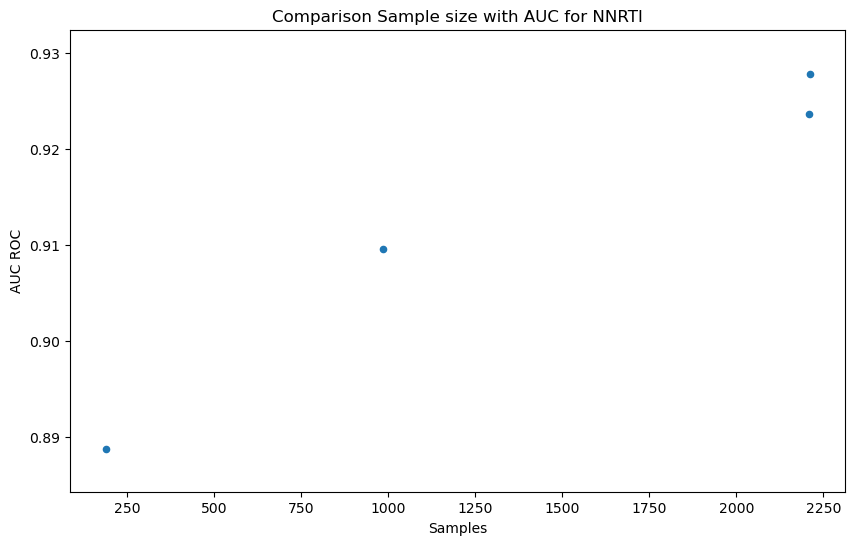

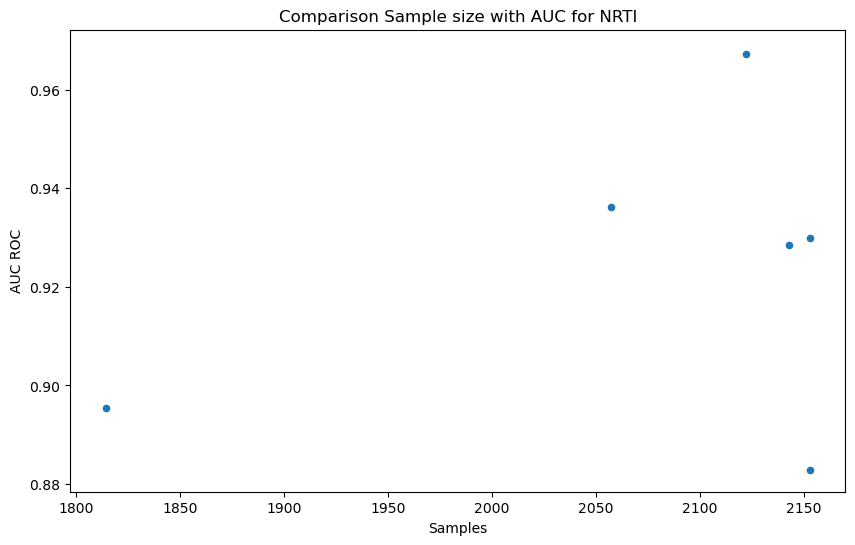

In [8]:
filepath_list = [pi_results_filepath, nnrti_results_filepath, nrti_results_filepath]


for filepath in filepath_list:
    target = pd.read_csv(filepath)
    ax = target.plot.scatter(x='Samples', y='AUC ROC', figsize=(10, 6))
    ax.set_ylim(target['AUC ROC'].min() * 0.995, min(1.0, target['AUC ROC'].max() * 1.005))
    ax.set_title('Comparison Sample size with AUC for ' + filepath.split("/")[1].strip("_DataSe_results.csv"))

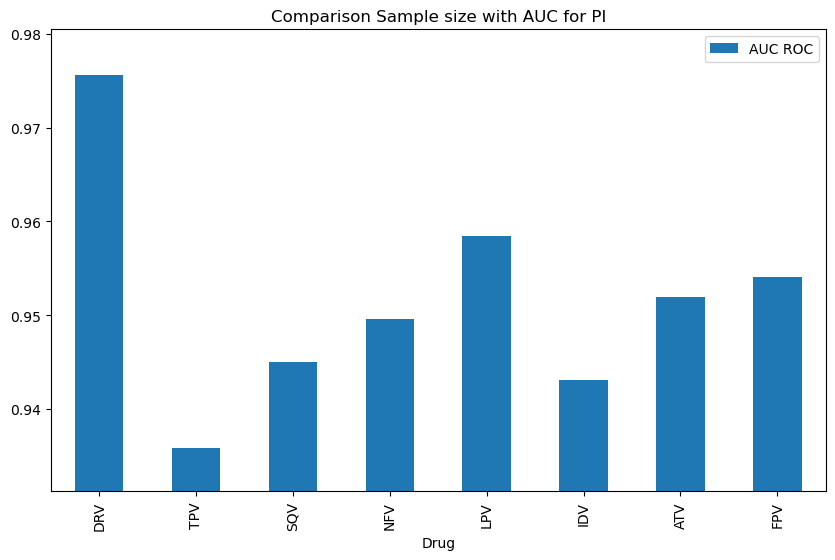

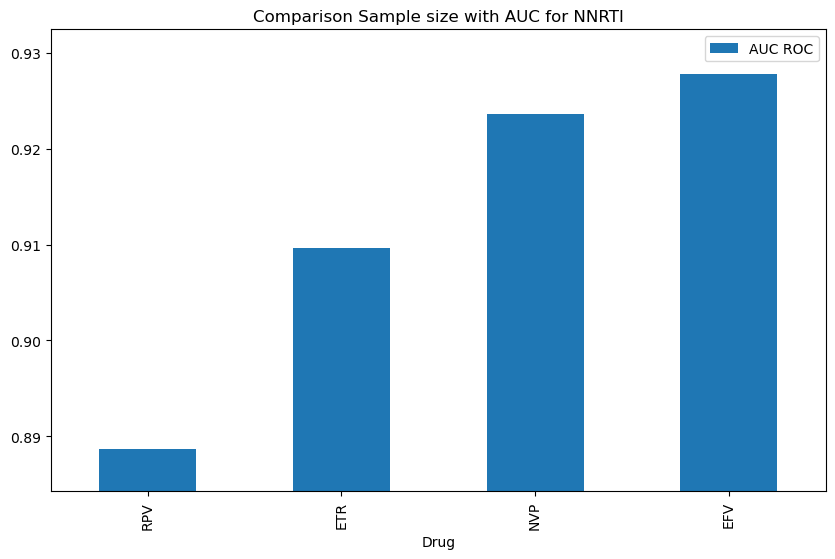

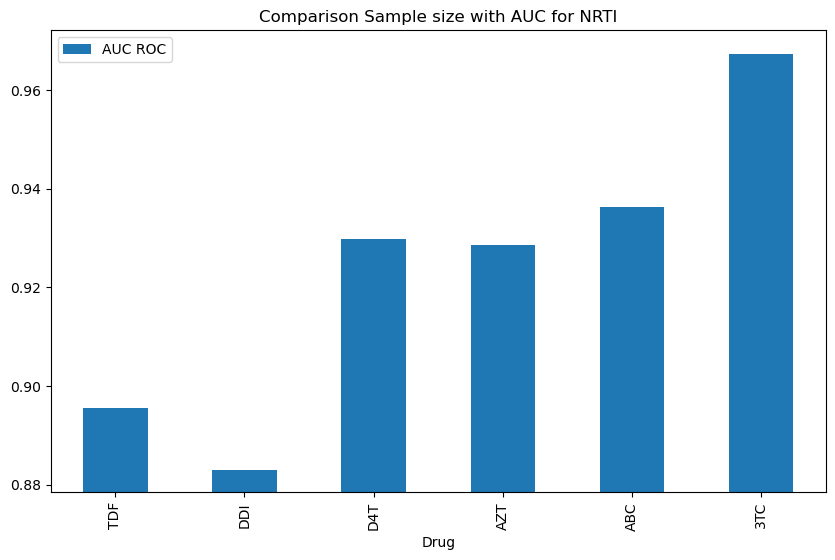

In [10]:
for filepath in filepath_list:
    target = pd.read_csv(filepath)
    ax = target.plot.bar(x='Drug', y='AUC ROC', figsize=(10, 6))
    ax.set_ylim(target['AUC ROC'].min() * 0.995, min(1.0, target['AUC ROC'].max() * 1.005))
    ax.set_title('Comparison TabPFN AUC for each drug ' + filepath.split("/")[1].strip("_DataSe_results.csv"))

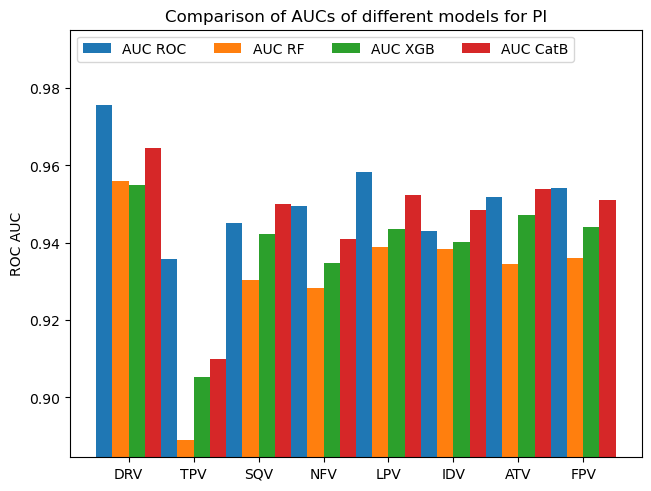

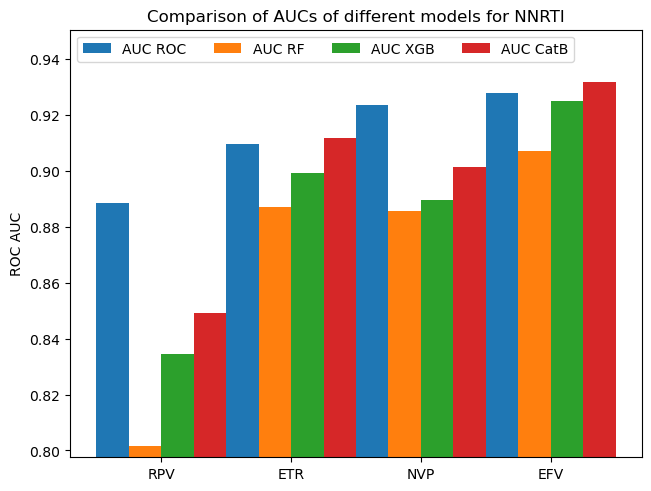

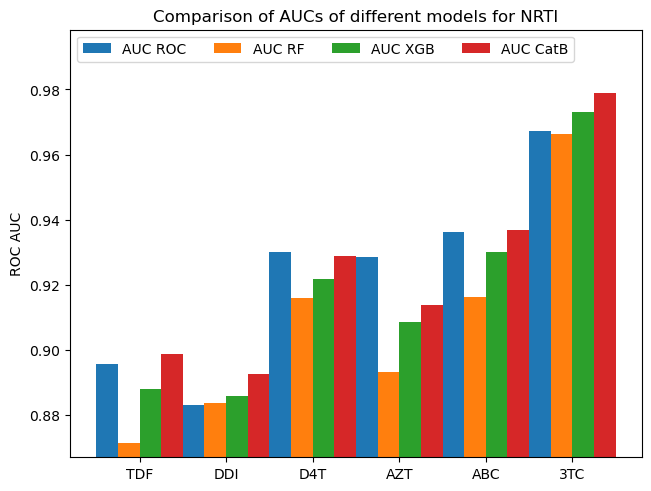

In [33]:
#Grouped bar charts, taken and modified from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

width = 0.25  # the width of the bars
multiplier = 0

for filepath in filepath_list:
    df = pd.read_csv(filepath)

    target = df.copy().filter(regex='AUC*')
    #target = np.round(target, decimals=3)
    fig, ax = plt.subplots(layout='constrained')

    x = np.arange(len(target))
    multiplier = 0

    min_auc = np.min(target)
    max_auc = np.max(target)

    for attribute, measurement in target.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('ROC AUC')
    ax.set_title('Comparison of AUCs of different models for ' + filepath.split("/")[1].strip("_DataSe_results.csv"))
    ax.set_xticks(x + width * (multiplier - 1) / 2)
    ax.set_xticklabels(df.Drug)
    ax.legend(loc='upper left', ncols=4)
    ax.set_ylim(min_auc * 0.995, min(1.0, max_auc * 1.02))

    plt.show()

    '''
    ax = target.plot.bar(x='Drug', y='AUC ROC', figsize=(10, 6))
    ax.set_ylim(target['AUC ROC'].min() * 0.995, min(1.0, target['AUC ROC'].max() * 1.005))
    ax.set_title('Comparison Sample size with AUC for ' + filepath.split("/")[1].strip("_DataSe_results.csv"))
    '''




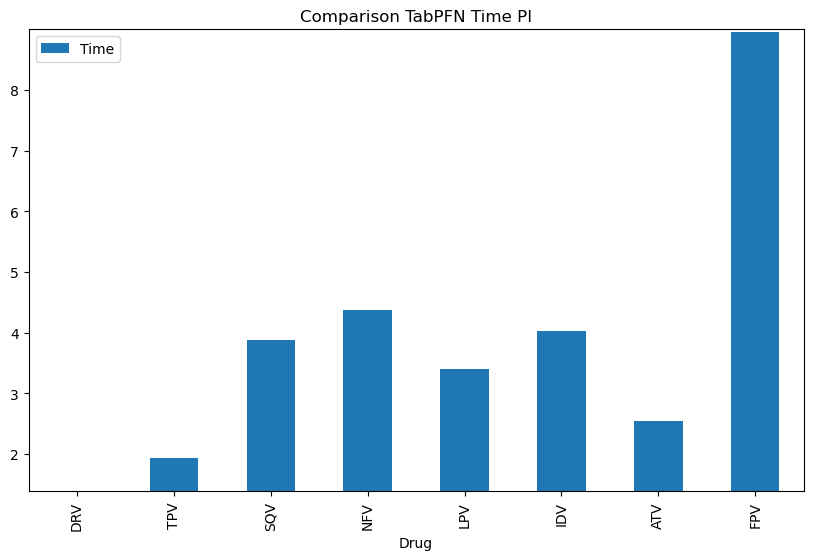

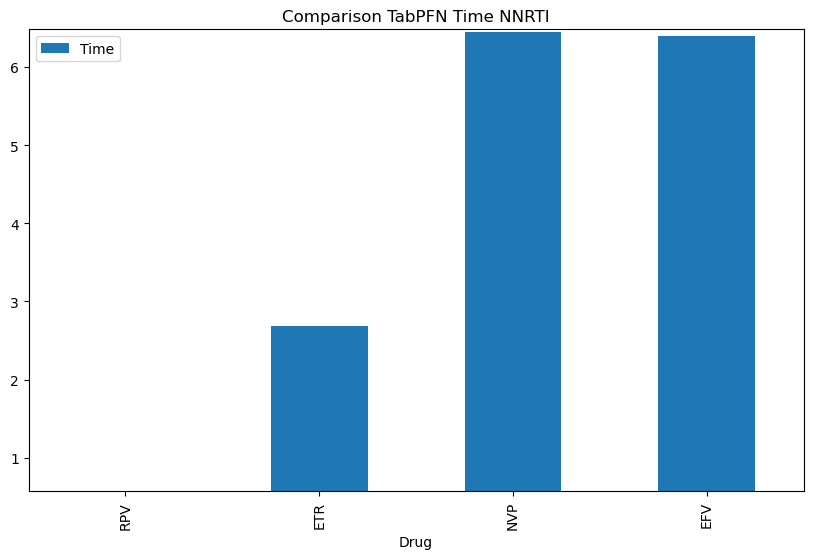

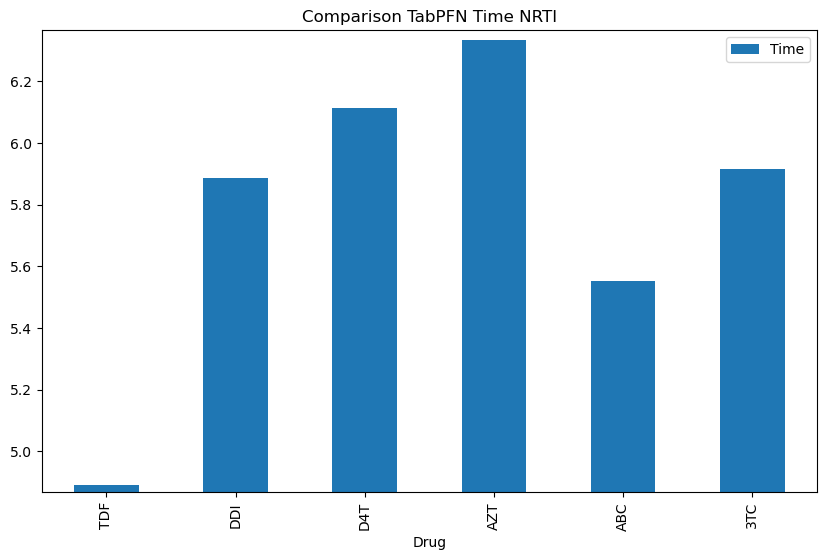

In [35]:
for filepath in filepath_list:
    target = pd.read_csv(filepath)
    ax = target.plot.bar(x='Drug', y='Time', figsize=(10, 6))
    ax.set_ylim(target['Time'].min() * 0.995, target['Time'].max() * 1.005)
    ax.set_title('Comparison TabPFN Time ' + filepath.split("/")[1].strip("_DataSe_results.csv"))